# 単回帰　スクラッチ実装

In [20]:
# ライブラリの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
% config InlineBackend.figure_format ='retina'

### データの読み込み

In [21]:
df= pd.read_excel('エクセル_ファイル名.xlsx')
df.head()

,MAX_TEMP,N_COFFEE
0,27,167
1,17,80
2,21,98
3,30,167
4,28,124


In [31]:
X = np.array(df.loc[:, ['MAX_TEMP']])
y = np.array(df.loc[:, ['N_COFFEE']])

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#### 性能評価のための関数を定義

In [24]:
#RMSE

def RMSE(X, y, theta):
    rmse = 0
    m = len(y)
    for i in range(m):
        y_pred = theta[0] + theta[1] * X[i]
        rmse += (y[i] - y_pred) ** 2
    rmse = np.sqrt(rmse/m) #sqrtは各要素の平方根を算出
    print(rmse)

In [25]:
#決定係数

def r2(X, y, theta):
    ss_t = 0
    ss_r = 0
    m = len(y)
    mean_y = np.mean(y)
    for i in range(m):
        y_pred = theta[0] + theta[1] * X[i]
        ss_t += (y[i] - mean_y) ** 2
        ss_r += (y[i] - y_pred) ** 2
    r2 = 1 - (ss_r/ss_t)
    print(r2)

**方法１ 確率的勾配降下法**
<br>https://medium.com/@dklvch/create-a-linear-regression-in-python-from-scratch-c4b855975cb9

In [36]:
def SGD(s_current, t_current, X, y, learning_rate, n_epoch):
    s_grad = 0
    t_grad = 0
    for epoch in range(n_epoch):
        n = len(y)
        for i in range(n):
            random_index = np.random.randint(n)
            xn = X[random_index]
            yn = y[random_index]
            s_grad += (1/n) * (((s_current * xn) + t_current) - yn)
            t_grad += (1/n) * xn * (((s_current * xn) + t_current) - yn)
            new_s = s_current - (learning_rate * s_grad)
            new_t = t_current - (learning_rate * t_grad)
    return [new_s, new_t]

In [59]:
a = SGD(0, 0, X_train, y_train, 0.0005, 1)
b = SGD(0, 0, X_train, y_train, 0.0005, 3)
c =  SGD(0, 0, X_train, y_train, 0.0005, 5)
d =  SGD(0, 0, X_train, y_train, 0.0005, 7)
e = SGD(0, 0, X_train, y_train, 0.00005, 200)

In [60]:
a #学習のたびに変動

[array([0.04710714]), array([0.81549286])]

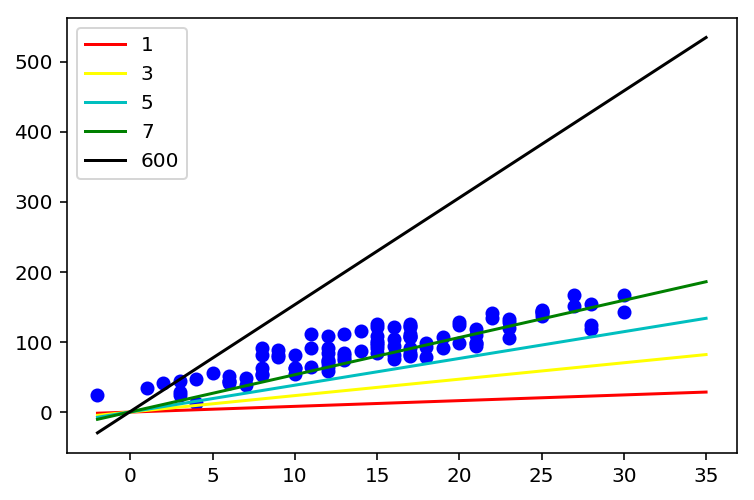

In [65]:
plt.scatter(X, y, c='b' )
X_new = np.array([[-2],[35]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict_a = X_new_b.dot(a)
plt.plot(X_new, y_predict_a, 'r-', label = 1)   
y_predict_b = X_new_b.dot(b)
plt.plot(X_new, y_predict_b, 'yellow', label = 3)   
y_predict_c = X_new_b.dot(c)
plt.plot(X_new, y_predict_c, 'c', label = 5)   
y_predict_d = X_new_b.dot(d)
plt.plot(X_new, y_predict_d, 'green', label = 7)   
y_predict_e = X_new_b.dot(e)
plt.plot(X_new, y_predict_e, 'black', label = 600)   
plt.legend(loc='upper left') 
plt.show()  

In [66]:
#n_epoch = 1
r2(X_train, y_train, a)
RMSE(X_train, y_train, a)
r2(X_test, y_test, a)
RMSE(X_test, y_test, a)

[-5.27478987]
[84.69847414]
[-5.69467774]
[86.39341309]


In [50]:
n_epoch = 3
r2(X_train, y_train, b)
RMSE(X_train, y_train, b)
r2(X_test, y_test, b)
RMSE(X_test, y_test, b)

[-2.78030573]
[65.74147671]
[-2.86917943]
[65.67880292]


In [51]:
n_epoch = 5
r2(X_train, y_train, c)
RMSE(X_train, y_train, c)
r2(X_test, y_test, c)
RMSE(X_test, y_test, c)

[-0.32033812]
[38.85246464]
[-0.16935193]
[36.10675102]


In [25]:
n_epoch = 7
r2(X_train, y_train, d)
RMSE(X_train, y_train, d)
r2(X_test, y_test, d)
RMSE(X_test, y_test, d)

[0.56692072]
[22.2515206]
[0.68916062]
[18.61589022]


In [26]:
n_epoch = 9
r2(X_train, y_train, e)
RMSE(X_train, y_train, e)
r2(X_test, y_test, e)
RMSE(X_test, y_test, e)

[0.47376152]
[24.52829118]
[0.37316349]
[26.43582918]


**改良版　確率的勾配降下法**<br>
new_t - t_current < 0.001 を満たすようになった時点で終了するはずだが・・・

In [27]:
def better_SGD(s_current, t_current, X_train, y_train, learning_rate, n_epoch):
    s_grad = 0
    t_grad = 0
    stop_point = 0.001
    for epoch in range(n_epoch):
        n = len(y_train)
        for i in range(n):
            random_index = np.random.randint(n)
            xn = X_train[random_index]
            yn = y_train[random_index]
            s_grad += (1/n) * (((s_current * xn) + t_current) - yn)
            t_grad += (1/n) * xn * (((s_current * xn) + t_current) - yn)
            new_s = s_current - (learning_rate * s_grad)
            new_t = t_current - (learning_rate * t_grad)
        if abs(new_t - t_current) < stop_point:#absは絶対値
            break
    return [new_s, new_t]

In [28]:
f = better_SGD(0, 0, X_train, y_train, 0.0005, 9)
f

[array([0.42365714]), array([7.28293571])]

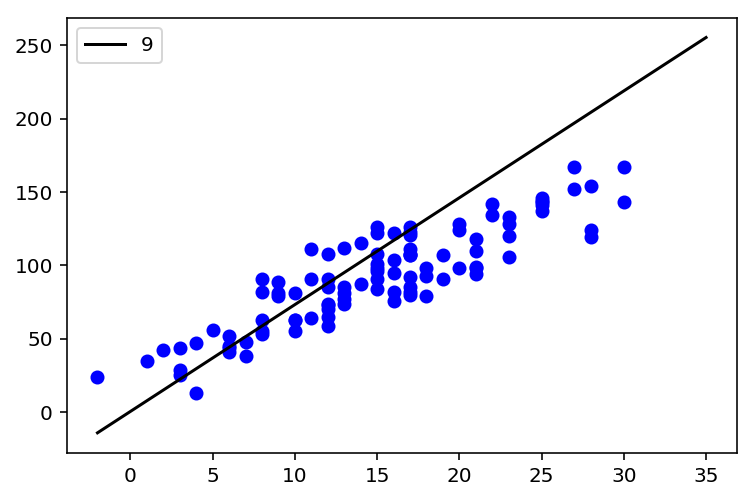

In [29]:
plt.scatter(X, y ,c='b') 
X_new = np.array([[-2],[35]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(f)
plt.plot(X_new, y_predict, 'black', label = 9)    
plt.legend(loc='upper left')               # 凡例を表示
plt.show() 

In [30]:
n_epoch = 9
r2(X_train, y_train, f)
RMSE(X_train, y_train, f)
r2(X_test, y_test, f)
RMSE(X_test, y_test, f)

[0.21572992]
[29.94393127]
[-0.00815407]
[33.52580757]


**方法２　バッチ勾配降下法**
<br> cf) HMLST   <i>p.111<i>

In [31]:
def Linear_batch_regression(X_train, y_train, learning_late, n_iterations):
    m = len(X_train)
    X_b = np.c_[np.ones((m, 1)), X_train] #バイアス項の追加
    theta = np.random.randn(2,1)
    for iteration in range (n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y_train)
        theta -= learning_late*gradients
    return theta

In [32]:
theta = Linear_batch_regression(X_train, y_train, 0.001, 1000)

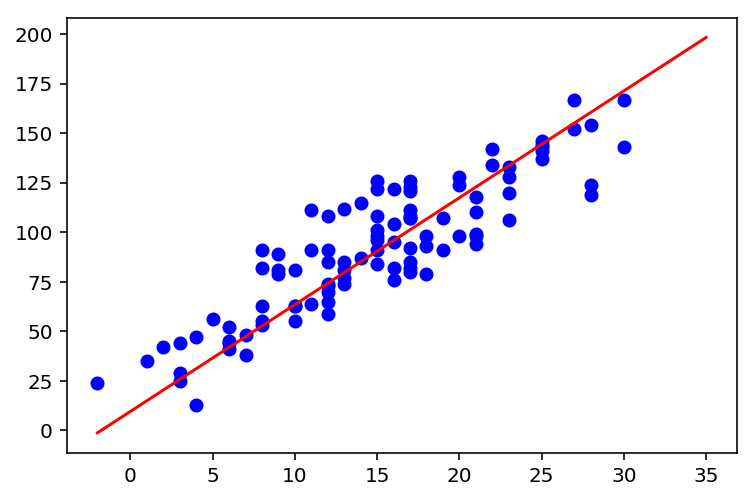

In [33]:
plt.scatter(X, y, c='b') 
X_new = np.array([[-2],[35]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta)
plt.plot(X_new, y_predict, 'r-')                    # 散布図を表示
plt.show()  

In [34]:
r2(X_train, y_train, theta)
RMSE(X_train, y_train, theta)
r2(X_test, y_test, theta)
RMSE(X_test, y_test, theta)

[0.71456281]
[18.06472169]
[0.77159192]
[15.95774514]


**方法３　正規方程式**

In [35]:
def LinearRegression(X_train, y_train):
    m = len(X_train)
    X_b = np.c_[np.ones((m, 1)), X_train]
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
    return theta_best

In [36]:
theta_best = LinearRegression(X_train, y_train)

In [37]:
X_new = np.array([[-2],[35]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 20.04800703],
       [179.82664416]])

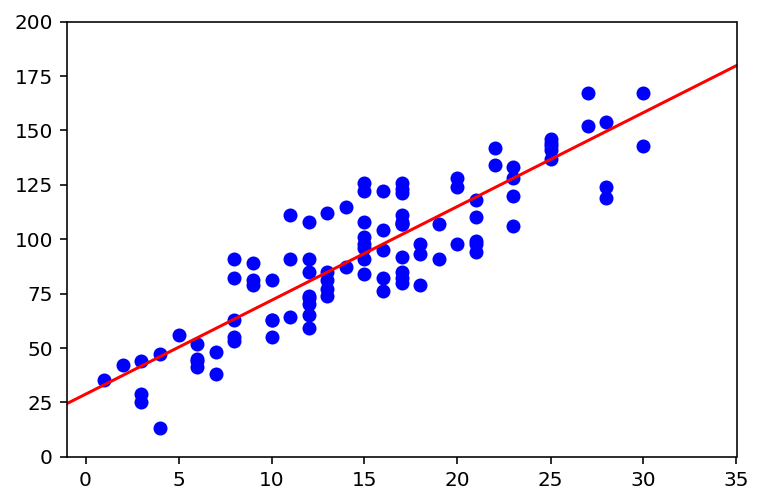

In [38]:
plt.plot(X_new, y_predict, c='r')
plt.scatter(X, y, c = 'b')
plt.axis([-1,35,0,200])
plt.show()

In [39]:
r2(X_train, y_train, theta_best)
RMSE(X_train, y_train, theta_best)
r2(X_test, y_test, theta_best)
RMSE(X_test, y_test, theta_best)

[0.77299743]
[16.10984564]
[0.83250335]
[13.66529003]


**課題**<br>
- 正規方程式の導出<br>
- 確率的勾配降下法で、n_epochに対する安定解が存在せず発散する理由と効果的な対策について